In [43]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from my_functions import plot_curves_test

In [44]:
# Define target
target = 'foot'

# Define runs to exclude from scoring sheet
runs_to_exclude = ['Run 1 - imbalanced, with planc7',
                    'Run 2 - imbalanced, with planc7, with scaling',
                    'Run 4 - imbalanced, with planc7, with street-filter',]

In [45]:
# Read data
df = pd.read_excel(f'../scores/{target}_scores.xlsx')

In [46]:
df['N_features'] = df['Model'].str.extract('(\d+)')
df['N_features'] = pd.to_numeric(df['N_features'], errors='coerce')

if target == 'caution':
    df['N_features'] = df['N_features'].fillna(3)
    print("Imputed NAs with 3")
elif target == 'foot':
    df['N_features'] = df['N_features'].fillna(4)
    print("Imputed NAs with 4")
    
df['Type'] = df['Model'].str.split().str[0]

# Impute 10 if 'Model' contains 'all'
df.loc[df['Model'].str.contains('all', case=False, na=False), 'N_features'] = 11

Imputed NAs with 4


In [47]:
# Filter runs
filtered_df = df[~df['Session_Name'].isin(runs_to_exclude)]

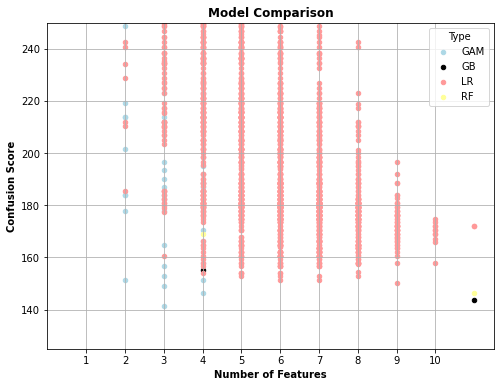

In [48]:
# Define colors for each unique value in the Model_Type column
colors = {'LR': '#FF9999', 'GAM': '#ADD8E6', 'RF': '#FFFF99', 'GB':'black'}

# Create a scatter plot with color based on Model_Type
plt.figure(figsize=(8, 6))
for model_type, group in filtered_df.groupby('Type'):
    plt.scatter(group['N_features'], group['Confusion_Score'], label=model_type, color=colors[model_type], marker='o', s=20)  # Adjust the size of points using the 's' parameter

plt.title('Model Comparison', fontweight='bold')
plt.xlabel('Number of Features', fontweight='bold')
plt.ylabel('Confusion Score', fontweight='bold')
plt.ylim(125, 250)  # Set y-axis limits
plt.xlim(0, filtered_df['N_features'].max()+0.5)
custom_ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.xticks(custom_ticks)
plt.legend(title='Type')
plt.grid(True)
plt.savefig(f'../plots/model_comparison_{target}.png', dpi=300)
plt.show()

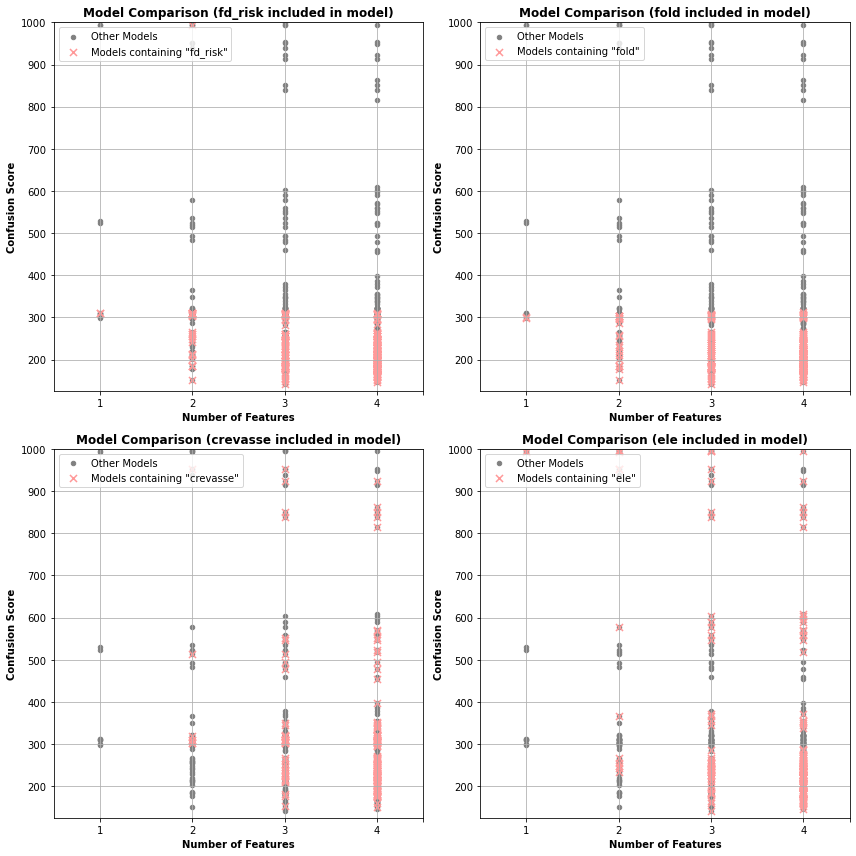

In [49]:
# Define color for points not meeting the substring condition
default_color = 'grey'

# Define list of substring conditions
substring_conditions = ['fd_risk', 'fold', 'crevasse', 'ele']

# Create a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Iterate over each condition and plot
for i, condition in enumerate(substring_conditions):
    # Calculate row and column indices for subplot
    row = i // 2
    col = i % 2
    
    # Select appropriate data based on the condition and 'N_features' value
    x_markers = filtered_df[(filtered_df['Model'].str.contains(condition, case=False)) & (filtered_df['N_features'] <= 4)]
    
    # Plot points with default color
    axs[row, col].scatter(filtered_df['N_features'], filtered_df['Confusion_Score'], label='Other Models', color=default_color, marker='o', s=20)
    
    # Plot points meeting the current substring condition with red color
    axs[row, col].scatter(x_markers['N_features'], x_markers['Confusion_Score'], color='#FF9999', marker='x', s=50, label=f'Models containing "{condition}"')
    
    axs[row, col].set_title(f'Model Comparison ({condition} included in model)', fontweight='bold')
    axs[row, col].set_xlabel('Number of Features', fontweight='bold')
    axs[row, col].set_ylabel('Confusion Score', fontweight='bold')
    axs[row, col].set_ylim(125, 1000) 
    axs[row, col].set_xlim(0.5, 4.5) 
    custom_ticks = [1, 2, 3, 4, 4.5]
    custom_ticklabels = [str(tick) if tick != 4.5 else '' for tick in custom_ticks] 
    axs[row, col].set_xticks(custom_ticks)
    axs[row, col].set_xticklabels(custom_ticklabels) 
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.savefig(f'../plots/model_comparison_features_{target}.png', dpi=300) 
plt.show()


In [50]:
# Sort the DataFrame by "Confusion_Score" in ascending order and get the top 15 rows
top_15 = filtered_df.sort_values(by='Confusion_Score', ascending=True).head(15)

# Reset index, start at 1, and format numerical values to two decimal places
top_15 = top_15.reset_index(drop=True)
top_15.index += 1
top_15 = top_15.round(2)

# Display the top 15 list
display(top_15)

,Date,Model,Session_Name,Optimized_Threshold,Confusion_Score,Accuracy,Precision,Recall,F1,ROC_AUC,N_features,Type
1,22.04.2024,GAM 3D s(fold) + fd_risk + ele,"Run 3 - imbalanced, with planc7, with tunnel-f...",0.23,141.43,0.98,0.59,0.59,0.59,0.92,3.0,GAM
2,22.04.2024,"GB (Tuned, all)","Run 3 - imbalanced, with planc7, with tunnel-f...",0.28,143.88,0.98,0.58,0.58,0.58,0.79,11.0,GB
3,22.04.2024,GAM 4D s(fold) + fd_risk + planc7 + ele,"Run 3 - imbalanced, with planc7, with tunnel-f...",0.23,146.38,0.98,0.58,0.58,0.58,0.92,4.0,GAM
4,22.04.2024,RF (all features),"Run 3 - imbalanced, with planc7, with tunnel-f...",0.33,146.57,0.98,0.57,0.58,0.58,0.79,11.0,RF
5,22.04.2024,GAM 3D s(fold) + fd_risk + planc7,"Run 3 - imbalanced, with planc7, with tunnel-f...",0.23,148.91,0.98,0.57,0.57,0.57,0.92,3.0,GAM
6,22.04.2024,LR 9D forest + ele + fold + ti + fd_maxv + cre...,"Run 3 - imbalanced, with planc7, with tunnel-f...",0.19,150.18,0.98,0.57,0.57,0.57,0.78,9.0,LR
7,22.04.2024,GAM 2D s(fold) + fd_risk,"Run 3 - imbalanced, with planc7, with tunnel-f...",0.22,151.47,0.98,0.57,0.57,0.57,0.92,2.0,GAM
8,22.04.2024,GAM 4D s(fold) + fd_risk + planc7 + crevasse,"Run 3 - imbalanced, with planc7, with tunnel-f...",0.23,151.47,0.98,0.57,0.57,0.57,0.92,4.0,GAM
9,22.04.2024,LR 6D forest + ele + fold + crevasse + aspect_...,"Run 3 - imbalanced, with planc7, with tunnel-f...",0.20,151.47,0.98,0.57,0.57,0.57,0.78,6.0,LR
10,22.04.2024,LR 7D forest + ele + fold + crevasse + aspect_...,"Run 3 - imbalanced, with planc7, with tunnel-f...",0.20,151.47,0.98,0.57,0.57,0.57,0.78,7.0,LR


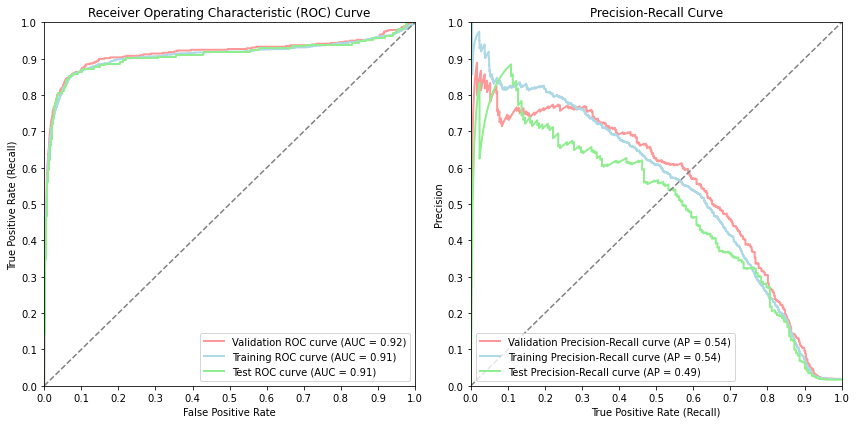

In [9]:
# Evaluate winner model on test set
train_set = pd.read_csv(f'../data/stage_2_{target}_train.csv')
val_set = pd.read_csv(f'../data/stage_2_{target}_val.csv')
test_set = pd.read_csv(f'../data/stage_2_{target}_test.csv')

# Define target variable
y_train = train_set[target]
y_val = val_set[target]
y_test = test_set[target]

# Read predicted probabilities from winner model
pred_train = pd.read_csv(f'../data/pred_train_{target}.csv')
pred_val = pd.read_csv(f'../data/pred_val_{target}.csv')
pred_test = pd.read_csv(f'../data/pred_test_{target}.csv')

plot_curves_test(pred_train, pred_val, pred_test, y_train, y_val, y_test, target)